## train a CNN model refer to the paper

1. 为什么val的acc和train的acc是反着的？
2. 模型的acc不如cnn2的，如何提升？
3. acc波动大，如何稳定？

### TODO: 
<p><input type="checkbox", disabled> 1. use the srep code for training data</p>
<p><input type="checkbox", disabled> 2. refactor the processing data code in a utils.py file</p>
<p><input type="checkbox", disabled> 3. check the input data</p>


In [1]:
# import numpy as np
# import h5py
# import os
# import matplotlib.pyplot as plt
# import sys

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D
# from tensorflow.keras.layers import LocallyConnected2D, MaxPooling2D
# from tensorflow.keras.layers import Flatten, Dense, Dropout, Activation
# from tensorflow.keras.optimizers import SGD
# from tensorflow.keras.datasets import fashion_mnist
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.callbacks import TensorBoard

# from tensorflow.compat.v1 import ConfigProto
# from tensorflow.compat.v1 import InteractiveSession

# from tensorflow.keras import backend as K

# # from sklearn.model_selection import train_test_split
# from data import load_whole_train_data

In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.layers import Conv2D, LocallyConnected2D, MaxPooling2D, Activation
from tensorflow.keras.layers import BatchNormalization, Dropout, Dense, Flatten
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.models import load_model
from tensorflow.keras import utils

from utils.data import load_whole_train_data

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

from tensorflow.keras import backend as K
import matplotlib.pyplot as plt

In [3]:
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)
K.set_session(session)  # set this TensorFlow session as the default session for Keras

In [4]:
# (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# x_train = x_train.reshape((x_train.shape[0],x_train.shape[1],x_train.shape[2],1))
# y_train = to_categorical(y_train, 10)
# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
#                                                   test_size=0.01, random_state=42)
# print(x_train.shape)
# print(y_train.shape)
# print(x_val.shape)
# print(y_val.shape)

# # x_test = x_test.reshape((x_test.shape[0],x_test.shape[1],x_test.shape[2],1))
# # y_test = to_categorical(y_test, 10)
# # print(x_test.shape)
# # print(y_test.shape)

In [5]:
# DATA_DIR = '../data/capg_baseline/'
# data_files = os.listdir(DATA_DIR)

# data_x = np.empty((3040000, 8, 16, 3))
# data_y = np.zeros((3040000, 8))
# i = 0
# for file_name in data_files:
#     if file_name.find('ab-') == -1:
#         continue
#     gesture_num = int(file_name[5:6])-1
#     h5f = h5py.File(os.path.join(DATA_DIR, file_name))
#     # 将数据切为50长度的片段
#     emg_data = h5f[file_name][:]
#     emg_data = emg_data.reshape((emg_data.shape[0]*1000, 
#                                  emg_data.shape[2], 
#                                  emg_data.shape[3], 
#                                  emg_data.shape[4]))
# #     print(emg_data.shape)
#     data_x[380000*i:380000*(i+1)] = emg_data
#     data_y[380000*i:380000*(i+1), gesture_num] = 1
#     i += 1
    
# print(data_x.shape)
# print(data_y.shape)

In [6]:
# # 抽样进行训练
# train_sample_index = np.random.choice(range(0, data_x.shape[0]), size=61440)
# x_train = data_x[train_sample_index]
# y_train = data_y[train_sample_index]
# print(x_train.shape)
# print(y_train.shape)

# test_sample_index = np.random.choice(range(0, data_x.shape[0]), size=640)
# x_test = data_x[test_sample_index]
# y_test = data_y[test_sample_index]
# print(x_test.shape)
# print(y_test.shape)

In [7]:
# import pandas as pd
# test = pd.DataFrame(y_train)

In [8]:
# print(test[test[0]==1.0].shape[0])
# print(test[test[1]==1.0].shape[0])
# print(test[test[2]==1.0].shape[0])
# print(test[test[3]==1.0].shape[0])
# print(test[test[4]==1.0].shape[0])
# print(test[test[5]==1.0].shape[0])
# print(test[test[6]==1.0].shape[0])
# print(test[test[7]==1.0].shape[0])

In [9]:
x, y = load_whole_train_data()

x_train = x.reshape(x.shape[0], 16, 8, 1)
y_train = utils.to_categorical(y - 1, 8)


print(x_train.shape)
print(y_train.shape)

(1440000, 16, 8, 1)
(1440000, 8)


In [10]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu',
                 input_shape=(16,8,1)))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(LocallyConnected2D(64, (1,1), activation='relu'))
model.add(LocallyConnected2D(64, (1,1), activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(units=8, activation='softmax'))

In [11]:
# optimizer = SGD(0.1, decay=0.0001)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 8, 64)         640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 8, 64)         36928     
_________________________________________________________________
locally_connected2d (Locally (None, 16, 8, 64)         532480    
_________________________________________________________________
locally_connected2d_1 (Local (None, 16, 8, 64)         532480    
_________________________________________________________________
dropout (Dropout)            (None, 16, 8, 64)         0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4

In [12]:
# tbCallBack = TensorBoard(log_dir='./logs',  # log directory
#                  histogram_freq=1,
#                  batch_size=32,
#                  write_graph=True,
#                  write_grads=True,
#                  write_images=True,
#                  embeddings_freq=0,
#                  update_freq='batch',
#                  embeddings_layer_names=None, 
#                  embeddings_metadata=None)

In [13]:
history = model.fit(x_train, y_train, batch_size=128, epochs=60, validation_split=0.1)

Train on 1296000 samples, validate on 144000 samples
Epoch 1/60
1296000/1296000 [==============================] - 337s 260us/sample - loss: 1.3161 - accuracy: 0.4864 - val_loss: 0.9487 - val_accuracy: 0.6351
Epoch 2/60
1296000/1296000 [==============================] - 335s 259us/sample - loss: 0.9513 - accuracy: 0.6427 - val_loss: 0.7694 - val_accuracy: 0.7138
Epoch 3/60
1296000/1296000 [==============================] - 332s 256us/sample - loss: 0.8299 - accuracy: 0.6912 - val_loss: 0.6976 - val_accuracy: 0.7369
Epoch 4/60
1296000/1296000 [==============================] - 335s 258us/sample - loss: 0.7602 - accuracy: 0.7192 - val_loss: 0.6418 - val_accuracy: 0.7642
Epoch 5/60
1296000/1296000 [==============================] - 335s 258us/sample - loss: 0.7162 - accuracy: 0.7367 - val_loss: 0.6188 - val_accuracy: 0.7739
Epoch 6/60
1296000/1296000 [==============================] - 334s 258us/sample - loss: 0.6844 - accuracy: 0.7494 - val_loss: 0.5872 - val_accuracy: 0.7869
Epoch 7/60


Epoch 53/60
1296000/1296000 [==============================] - 237s 183us/sample - loss: 0.4496 - accuracy: 0.8429 - val_loss: 0.4522 - val_accuracy: 0.8391
Epoch 54/60
1296000/1296000 [==============================] - 238s 184us/sample - loss: 0.4476 - accuracy: 0.8433 - val_loss: 0.4448 - val_accuracy: 0.8468
Epoch 55/60
1296000/1296000 [==============================] - 238s 183us/sample - loss: 0.4456 - accuracy: 0.8442 - val_loss: 0.4482 - val_accuracy: 0.8442
Epoch 56/60
1296000/1296000 [==============================] - 239s 184us/sample - loss: 0.4453 - accuracy: 0.8444 - val_loss: 0.4543 - val_accuracy: 0.8408
Epoch 57/60
1296000/1296000 [==============================] - 236s 182us/sample - loss: 0.4461 - accuracy: 0.8441 - val_loss: 0.4470 - val_accuracy: 0.8488
Epoch 58/60
1296000/1296000 [==============================] - 235s 181us/sample - loss: 0.4451 - accuracy: 0.8450 - val_loss: 0.4430 - val_accuracy: 0.8434
Epoch 59/60
1296000/1296000 [=============================

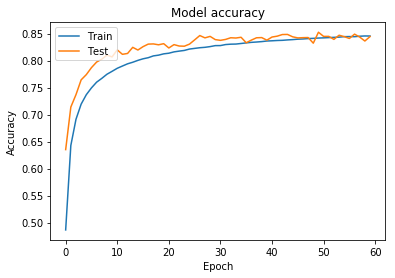

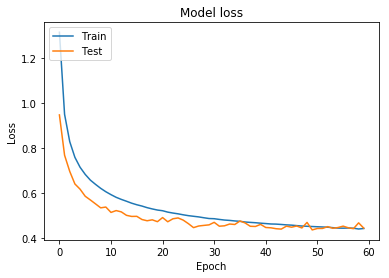

In [14]:
# 绘制训练 & 验证的准确率值
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 绘制训练 & 验证的损失值
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()